In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Load data

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")
df_meta = pd.read_csv("../data/metadata.csv")

In [4]:
df_train['var4'].value_counts().sort_values(ascending=False)

-999      936
 976        4
 3924       3
 31056      3
 30810      3
         ... 
 8092       1
 1951       1
 30625      1
 28578      1
 9622       1
Name: var4, Length: 13094, dtype: int64

In [22]:
df_sub = pd.read_csv("../output/mario/sub_lgbm-v3.csv")
df_sub["y"] = df_sub["predicted"]
df_sub.head()

,id,predicted,y
0,0,1,1
1,2,1,1
2,4,0,0
3,7,0,0
4,15,1,1


In [5]:
df = pd.concat([df_train, df_test], axis=0).reset_index()
df.head()

,index,id,var1,var2,var3,var4,var5,var6,var7,var8,...,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,0,1,18,19,2853,29442,1386,2435,35,-999,...,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1.0
1,1,8,4,110,1986,13684,7189,-999,-999,17,...,-999.000000,-999.000000,0.070991,0.773966,0.019315,-999.000000,-999.00000,0.147059,0.106618,0.0
2,2,30,0,39,1019,10232,678,791,16,-999,...,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.000000,-999.00000,0.382353,0.242647,0.0
3,3,43,20,39,1751,2689,8235,1042,13,10,...,-999.000000,0.352379,0.044301,0.951564,0.023684,0.363370,0.00201,0.147059,0.132353,0.0
4,4,46,7,44,2262,29428,6031,304,16,-999,...,0.021226,0.226161,0.059125,0.906155,0.020733,-999.000000,-999.00000,0.455882,0.132353,1.0


In [9]:
df.replace(-999, np.nan)['var4'].value_counts()

31056.0    10
31121.0     7
976.0       7
1946.0      6
27275.0     6
           ..
11943.0     1
20208.0     1
10732.0     1
6228.0      1
22.0        1
Name: var4, Length: 32403, dtype: int64

---

# Train Test Split Indexes Plot

<IPython.core.display.Javascript object>


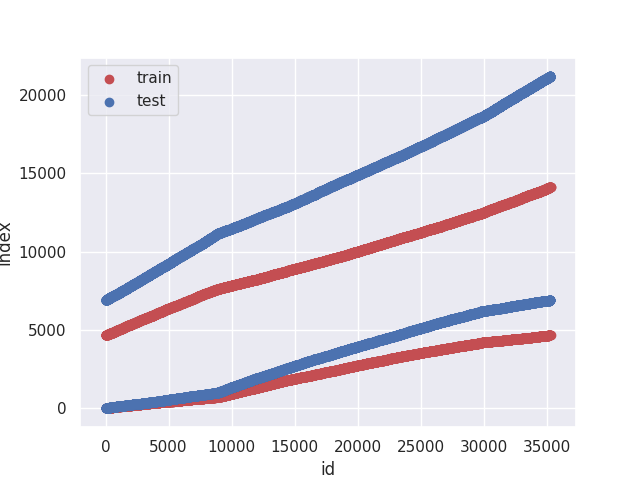

In [34]:
# %matplotlib notebook
%matplotlib inline
plt.figure(figsize=(22, 8))
plt.scatter(df_train['id'], df_train.index, color="r", label='train')
plt.scatter(df_test['id'], df_test.index,  color="b", label="test")
plt.xlabel("id")
plt.ylabel("index")
plt.legend()
plt.show()

In [ ]:
# %matplotlib notebook
# %matplotlib inline
plt.figure(figsize=(22, 8))
plt.plot(df_train['id'], df_train.index, color="r", label='train')
# plt.line(df_test['id'], df_test.index,  color="b", label="test")
plt.xlabel("id")
plt.ylabel("index")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


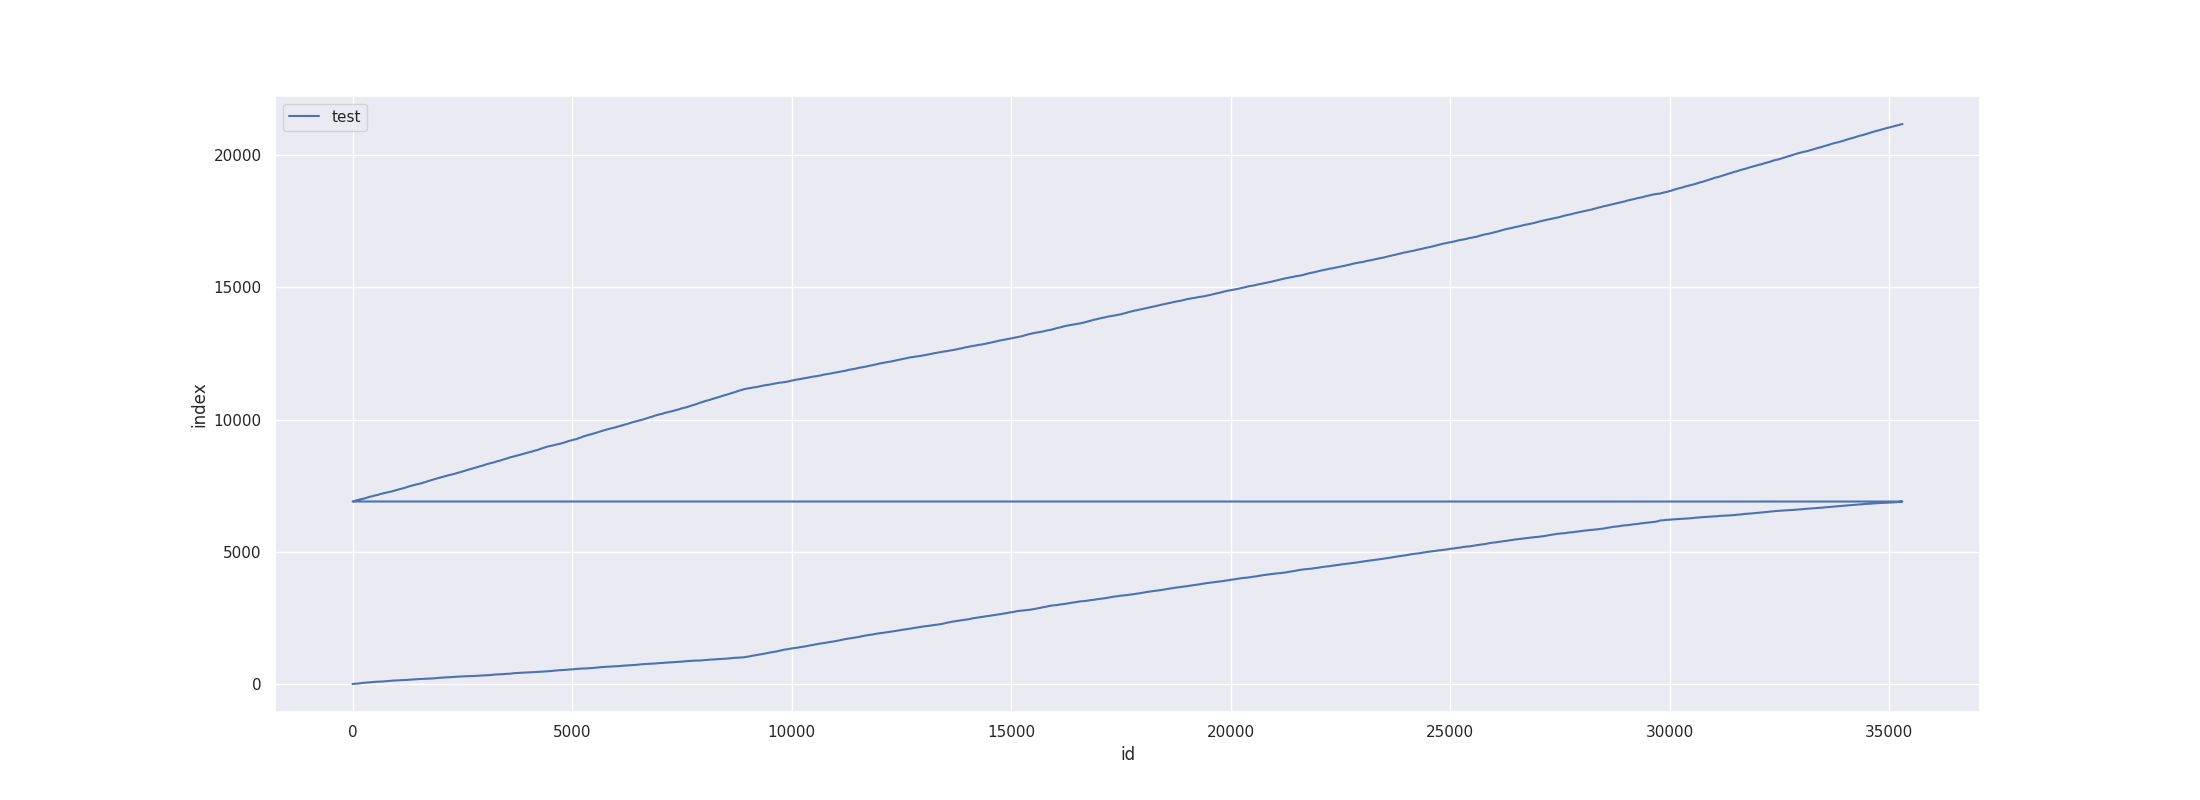

/home/mario/venv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/mario/venv/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/home/mario/venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


In [35]:
# %matplotlib notebook
# %matplotlib inline
plt.figure(figsize=(22, 8))
plt.plot(df_test['id'], df_test.index, color="b", label='test')
# plt.line(df_test['id'], df_test.index,  color="b", label="test")
plt.xlabel("id")
plt.ylabel("index")
plt.legend()
plt.show()

In [ ]:
# %matplotlib inline
plt.figure(figsize=(22, 8))
plt.scatter(df[df["y"]==0]['id'], df[df["y"]==0].index, color="b", label='0')
plt.scatter(df[df["y"]==1]['id'], df[df["y"]==1].index + 1000, color="r", label='1')
plt.xlabel("id")
plt.ylabel("index")
plt.legend()
plt.show()

In [36]:
df_train['y'].value_counts()/df_train.shape[0]

0    0.798202
1    0.201798
Name: y, dtype: float64

In [37]:
df_sub["y"].value_counts()/df_sub.shape[0]

0    0.799745
1    0.200255
Name: y, dtype: float64

In [38]:
df_train["index"] = df_train.index

<IPython.core.display.Javascript object>


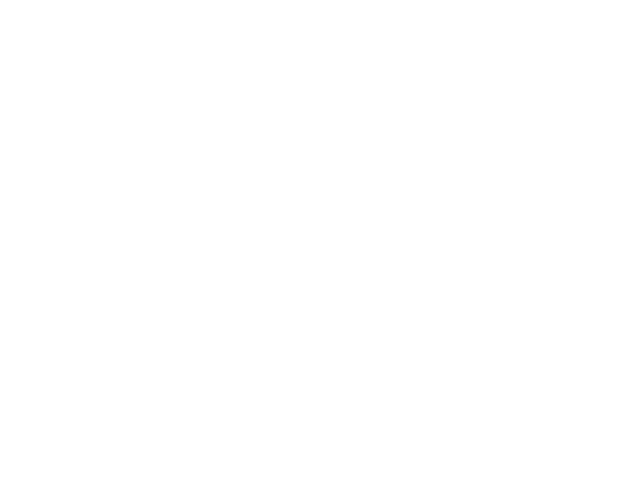

In [39]:
%matplotlib notebook
sns.scatterplot(data=df_train, x="id", y="index", size="y")

<IPython.core.display.Javascript object>


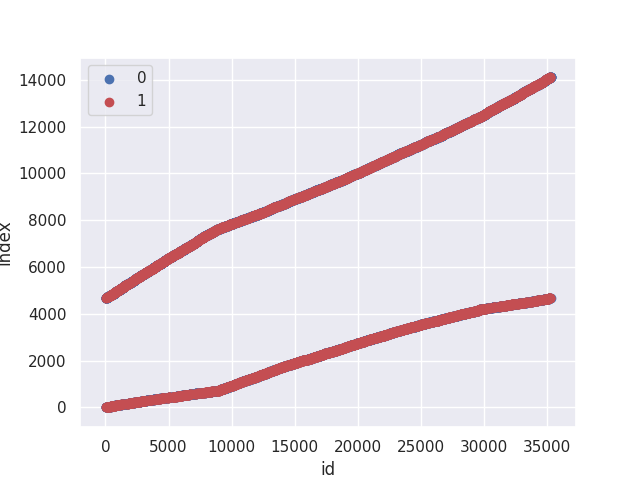

In [40]:
%matplotlib notebook
# plt.figure(figsize=(22, 8))
plt.scatter(df_train[df_train["y"]==0]['id'], df_train[df_train["y"]==0].index, color="b", label='0')
plt.scatter(df_train[df_train["y"]==1]['id'], df_train[df_train["y"]==1].index, color="r", label='1')
plt.xlabel("id")
plt.ylabel("index")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(22, 8))
plt.scatter(df_train[df_train["y"]==1]['id'], df_train[df_train["y"]==1]['var4'], color="r", label='1')
plt.scatter(df_train[df_train["y"]==0]['id'], df_train[df_train["y"]==0]['var4'], color="b", label='0')
plt.xlabel("id")
plt.ylabel("var4")
plt.legend()
plt.show()

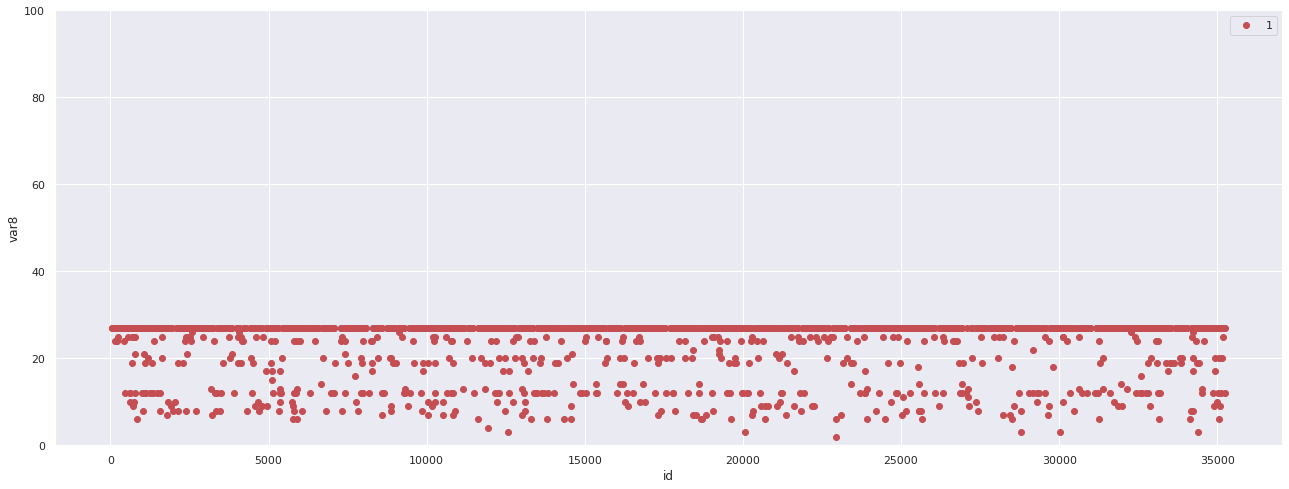

In [41]:
%matplotlib inline
plt.figure(figsize=(22, 8))
plt.scatter(df_train[df_train["y"]==1]['id'], df_train[df_train["y"]==1]['var8'], color="r", label='1')
# plt.scatter(df_train[df_train["y"]==0]['id'], df_train[df_train["y"]==0]['var8'], color="b", label='0')
plt.xlabel("id")
plt.ylabel("var8")
plt.ylim(0, 100)
plt.legend()
plt.show()

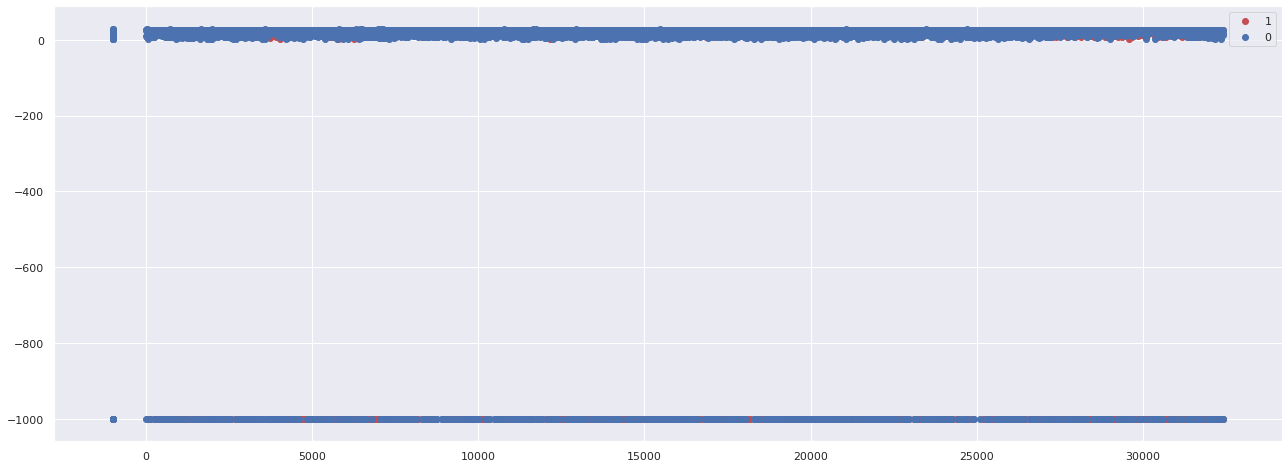

In [42]:
%matplotlib inline
plt.figure(figsize=(22, 8))
plt.scatter(df_train[df_train["y"]==1]['var4'], df_train[df_train["y"]==1]['var8'], color="r", label='1')
plt.scatter(df_train[df_train["y"]==0]['var4'], df_train[df_train["y"]==0]['var8'], color="b", label='0')
# plt.xlabel("id")
# plt.ylabel("var8")
# plt.ylim(0, 100)
plt.legend()
plt.show()

In [43]:
df_train[df_train.index > 6800]["y"].value_counts()

0    6202
1    1120
Name: y, dtype: int64

In [44]:
df_train[df_train.index < 6800]["y"].value_counts()

0    5071
1    1729
Name: y, dtype: int64

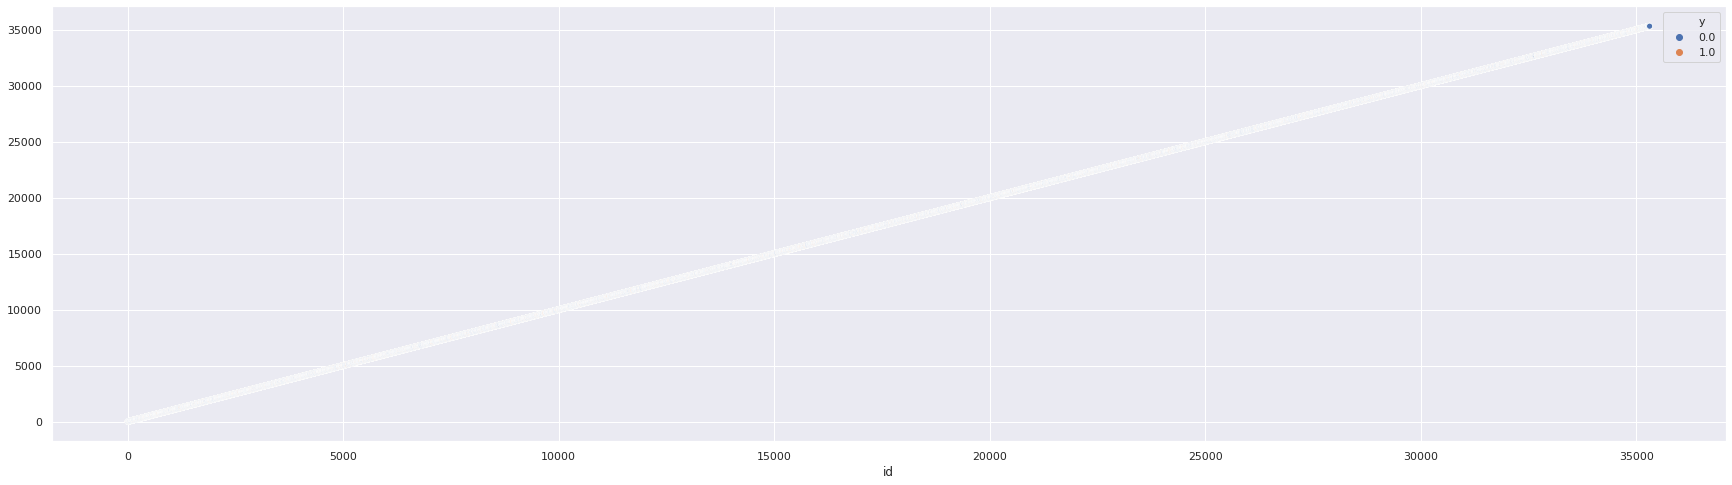

In [45]:
# df = df.sort_values("id")
plt.figure(figsize=(30, 8))
sns.scatterplot(x=df['id'], y=df.index, hue=df["y"])

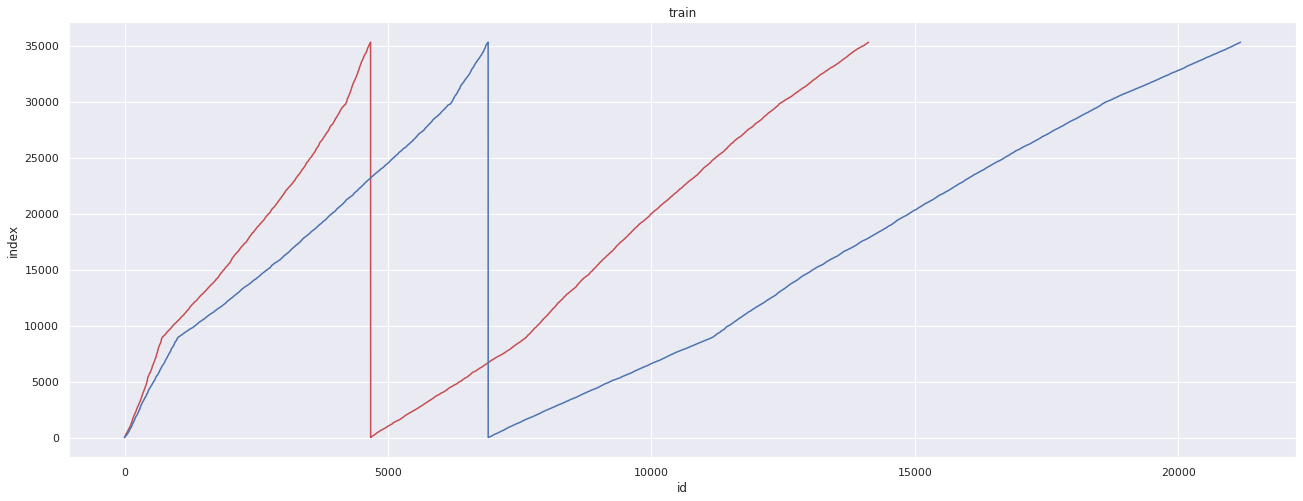

In [46]:
plt.figure(figsize=(22, 8))
plt.plot(df_train['id'], color="r")
plt.plot(df_test['id'], color="b")
plt.xlabel("id")
plt.ylabel("index")
plt.title("train")
plt.show()

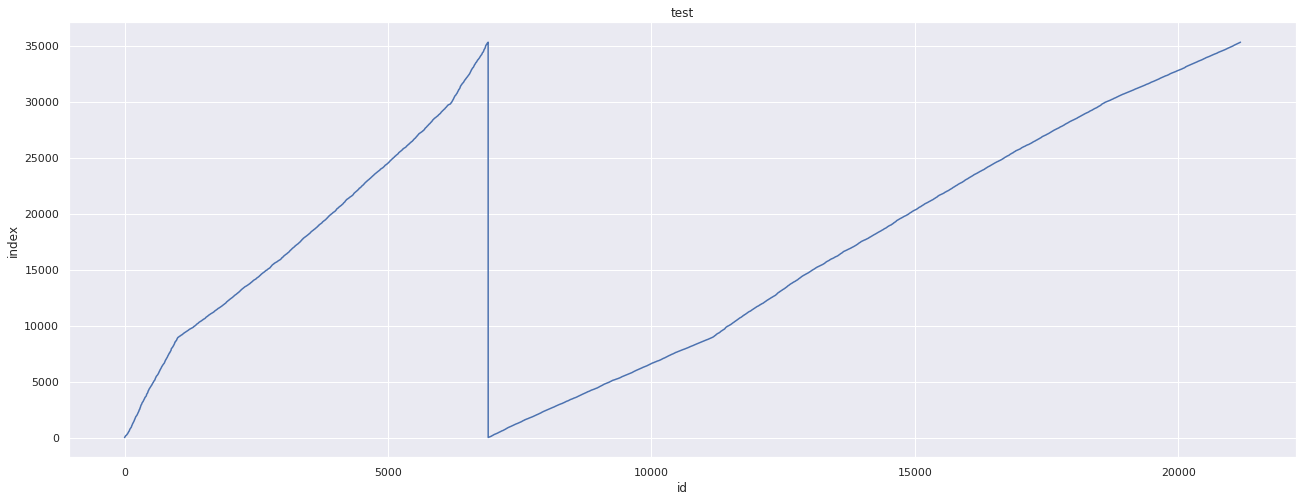

In [47]:
plt.figure(figsize=(22, 8))
plt.plot(df_test['id'], color="b")
plt.xlabel("id")
plt.ylabel("index")
plt.title("test")
plt.show()

/home/mario/venv/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


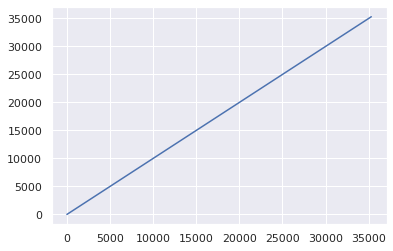

In [48]:
plt.plot(df.index)
# plt.plot(df_train['id'], color="r")

In [49]:
df_train.sort_values("id")["id"].diff()

0        NaN
4672     5.0
1        2.0
4673     2.0
4674     1.0
        ... 
14119    1.0
14120    5.0
14121    3.0
4671     1.0
14122    1.0
Name: id, Length: 14123, dtype: float64

In [50]:
df_test.sort_values("id")["id"].diff()

0        NaN
1        2.0
6903     1.0
2        1.0
6904     1.0
        ... 
21179    1.0
6902     1.0
21180    1.0
21181    2.0
21182    1.0
Name: id, Length: 21183, dtype: float64

---

# Columns ranges and uniqueness

In [6]:
cols_type = df_meta.drop(0).groupby("Variavel tipo")["Variavel cod"].apply(list)
cols_type

Variavel tipo
Qualitativo nominal      [var1, var2, var3, var4, var5, var6, var7, var...
Qualitativo ordinal                           [var26, var32, var42, var43]
Quantitativo continua    [var55, var56, var57, var58, var59, var60, var...
Quantitativo discreto    [var24, var25, var27, var40, var44, var45, var...
Name: Variavel cod, dtype: object

In [7]:
cols_type.apply(len)

Variavel tipo
Qualitativo nominal      35
Qualitativo ordinal       4
Quantitativo continua    12
Quantitativo discreto    18
Name: Variavel cod, dtype: int64

## Qualitativo nominal

In [61]:
for col in cols_type["Qualitativo nominal"]:
    _max = df_train[df_train[col] != -999][col].max()
    _min = df_train[df_train[col] != -999][col].min()
    n = df_train[df_train[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}")

var1, (0, 30), unique: 29
var2, (1, 129), unique: 84
var3, (1, 3546), unique: 2442
var4, (0, 32403), unique: 13093
var5, (0, 11373), unique: 6296
var6, (2, 3001), unique: 1778
var7, (1, 36), unique: 32
var8, (1, 28), unique: 28
var9, (1, 3), unique: 3
var10, (1, 85), unique: 60
var11, (3, 30859), unique: 12383
var12, (2, 8800), unique: 5269
var13, (0, 2299), unique: 1499
var14, (0, 27), unique: 28
var15, (1, 78), unique: 76
var16, (1, 78), unique: 76
var17, (1, 32), unique: 32
var18, (1, 6), unique: 6
var19, (0, 1803), unique: 1201
var20, (0, 27), unique: 28
var21, (1, 2436), unique: 1534
var22, (0, 5), unique: 6
var23, (0, 4), unique: 5
var28, (0, 27), unique: 28
var29, (0, 5), unique: 6
var30, (0, 2), unique: 3
var31, (0, 1), unique: 2
var33, (0, 6), unique: 7
var34, (0, 68), unique: 69
var35, (1, 696), unique: 567
var36, (0, 33), unique: 33
var37, (0, 56), unique: 47
var38, (0, 30), unique: 29
var39, (0, 5), unique: 6
var41, (0, 9), unique: 10


In [62]:
for col in cols_type["Qualitativo nominal"]:
    _max = df_test[df_test[col] != -999][col].max()
    _min = df_test[df_test[col] != -999][col].min()
    n = df_test[df_test[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}")

var1, (0, 30), unique: 30
var2, (3, 129), unique: 113
var3, (3, 3547), unique: 2905
var4, (2, 32400), unique: 19564
var5, (0, 11372), unique: 8181
var6, (0, 2999), unique: 2227
var7, (1, 36), unique: 31
var8, (1, 28), unique: 28
var9, (1, 3), unique: 3
var10, (1, 85), unique: 70
var11, (1, 30860), unique: 18535
var12, (1, 8799), unique: 6611
var13, (1, 2299), unique: 1815
var14, (0, 27), unique: 28
var15, (1, 78), unique: 78
var16, (1, 78), unique: 78
var17, (1, 32), unique: 32
var18, (1, 6), unique: 6
var19, (0, 1802), unique: 1426
var20, (0, 27), unique: 28
var21, (0, 2434), unique: 1860
var22, (0, 5), unique: 6
var23, (0, 4), unique: 5
var28, (0, 27), unique: 28
var29, (0, 5), unique: 6
var30, (0, 2), unique: 3
var31, (0, 1), unique: 2
var33, (0, 6), unique: 7
var34, (0, 68), unique: 69
var35, (0, 696), unique: 609
var36, (0, 33), unique: 33
var37, (0, 56), unique: 53
var38, (0, 30), unique: 25
var39, (0, 5), unique: 6
var41, (0, 9), unique: 10


## Quantitativo continua

In [63]:
for col in cols_type["Quantitativo continua"]:
    _max = df_train[df_train[col] != -999][col].max()
    _min = df_train[df_train[col] != -999][col].min()
    n = df_train[df_train[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}")

var55, (0.0, 0.7508577964466999), unique: 14003
var56, (0.0, 1.0), unique: 647
var57, (0.0, 1.0), unique: 20
var58, (0.0, 1.0), unique: 8093
var59, (0.0, 0.91377296548867), unique: 8813
var60, (0.0, 1.0), unique: 6776
var61, (0.0, 0.93499402272444), unique: 9435
var62, (0.0, 0.8148459369042399), unique: 11613
var63, (0.0, 1.0), unique: 878
var64, (0.00426668029279, 0.3873864667032801), unique: 3619
var65, (0.0, 1.0), unique: 1542
var66, (0.0, 1.0), unique: 180


In [64]:
for col in cols_type["Quantitativo continua"]:
    _max = df_test[df_test[col] != -999][col].max()
    _min = df_test[df_test[col] != -999][col].min()
    n = df_test[df_test[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}")

var55, (0.12891431830381, 1.0), unique: 20929
var56, (0.0, 1.0), unique: 646
var57, (0.0, 1.0), unique: 20
var58, (0.0, 0.9686201379512), unique: 11044
var59, (0.00155933687651, 1.0), unique: 11931
var60, (0.0, 0.9934112009408299), unique: 9888
var61, (0.00454696876054, 1.0), unique: 12700
var62, (0.0004600622869700001, 1.0), unique: 16182
var63, (0.0, 1.0), unique: 921
var64, (0.0, 1.0), unique: 4331
var65, (0.0, 0.99845702823638), unique: 2157
var66, (0.0, 0.39262981574874), unique: 236


## Quantitativo discreto

In [65]:
for col in cols_type["Quantitativo discreto"]:
    _max = df_train[df_train[col] != -999][col].max()
    _min = df_train[df_train[col] != -999][col].min()
    n = df_train[df_train[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}")

var24, (0, 2), unique: 3
var25, (0, 4), unique: 5
var27, (0, 1), unique: 2
var40, (0, 20), unique: 21
var44, (0, 1), unique: 2
var45, (0, 15), unique: 16
var46, (0, 15), unique: 15
var47, (0, 5), unique: 6
var48, (0, 9), unique: 10
var49, (0, 1), unique: 2
var50, (0, 1), unique: 2
var51, (0, 1), unique: 2
var52, (1, 64), unique: 64
var53, (0, 3), unique: 4
var54, (0, 3), unique: 4
var67, (0.02941176470588, 0.9117647058823499), unique: 58
var68, (0.00367647058823, 1.0), unique: 96
y, (0, 1), unique: 2


In [66]:
for col in cols_type["Quantitativo discreto"]:
    if "y" not in col:
        _max = df_test[df_test[col] != -999][col].max()
        _min = df_test[df_test[col] != -999][col].min()
        n = df_test[df_test[col] != -999][col].nunique()
        print(f"{col}, ({_min}, {_max}), unique: {n}")

var24, (0, 2), unique: 3
var25, (0, 4), unique: 5
var27, (0, 2), unique: 3
var40, (0, 20), unique: 21
var44, (0, 1), unique: 2
var45, (0, 16), unique: 15
var46, (0, 16), unique: 15
var47, (0, 6), unique: 7
var48, (0, 10), unique: 10
var49, (0, 1), unique: 2
var50, (0, 1), unique: 2
var51, (0, 1), unique: 2
var52, (1, 65), unique: 65
var53, (0, 3), unique: 4
var54, (0, 3), unique: 4
var67, (0.0, 1.0), unique: 64
var68, (0.0, 0.66544117647058), unique: 101


## Qualitativo ordinal

In [67]:
for col in cols_type["Qualitativo ordinal"]:
    _max = df_train[df_train[col] != -999][col].max()
    _min = df_train[df_train[col] != -999][col].min()
    n = df_train[df_train[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}")

var26, (1, 10), unique: 10
var32, (0, 23), unique: 24
var42, (1, 31), unique: 31
var43, (0, 20), unique: 20


In [68]:
for col in cols_type["Qualitativo ordinal"]:
    _max = df_test[df_test[col] != -999][col].max()
    _min = df_test[df_test[col] != -999][col].min()
    n = df_test[df_test[col] != -999][col].nunique()
    print(f"{col}, ({_min}, {_max}), unique: {n}, ")

var26, (1, 10), unique: 10, 
var32, (0, 23), unique: 24, 
var42, (0, 31), unique: 30, 
var43, (0, 20), unique: 21, 


In [43]:
df[cols_type[1]].replace(-999, np.nan).isna().sum()

var26    3959
var32       0
var42       0
var43       0
dtype: int64

# Possible dates

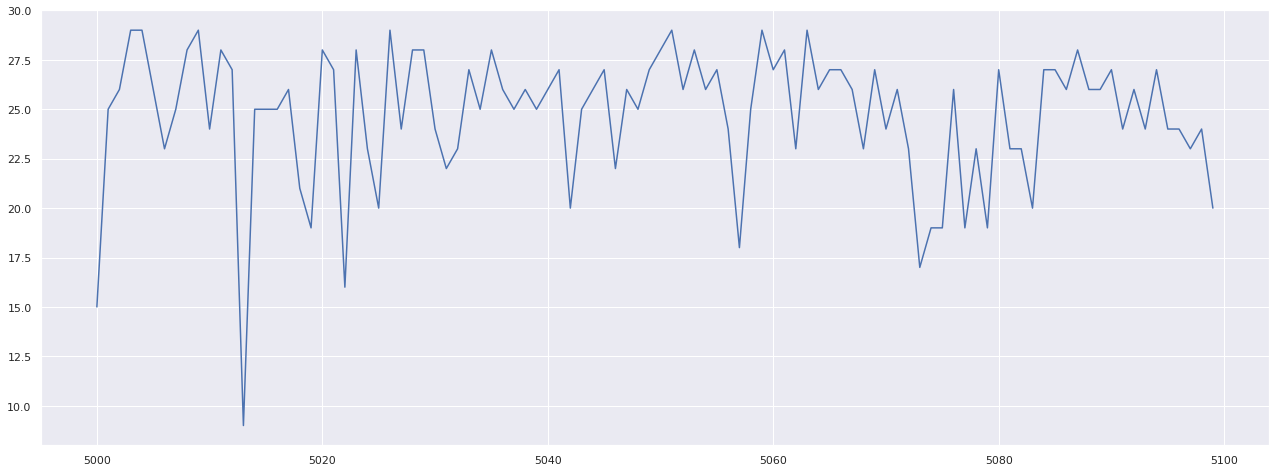

In [18]:
df_train.iloc[5000:5100]['var42'].plot(figsize=(22, 8))

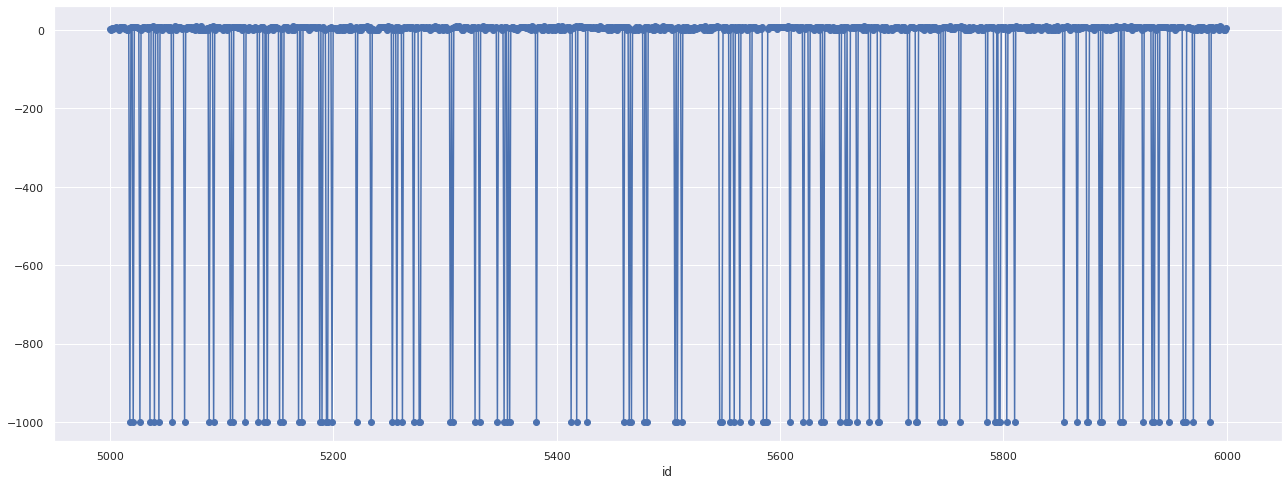

In [37]:
# mask = df['var26'] != -999
data = df.set_index('id').sort_index().iloc[5000:6000]['var26']
data.plot(figsize=(22, 8), marker='o')